# LIME plots

Ressources:

https://marcotcr.github.io/lime/tutorials/Tutorial%20-%20continuous%20and%20categorical%20features.html

https://medium.com/mlearning-ai/shap-force-plots-for-classification-d30be430e195
https://stackoverflow.com/questions/65549588/shap-treeexplainer-for-randomforest-multiclass-what-is-shap-valuesi

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from evaluation import evaluation_classification

import lime
import lime.lime_tabular
import numpy as np
import random
import shap
import pandas as pd
import matplotlib.pyplot as plt

import sklearn
import seaborn as sn
from joblib import load

import matplotlib.pyplot as plt
import matplotlib

In [2]:
# read all prepared data

name_array = ["X_train_sub", "y_train_sub", "X_exp_train_sub", "y_exp_train_sub", \
              "X_train", "y_train", "X_test", "y_test", \
              "X_exp_train", "y_exp_train", "X_exp_test", "y_exp_test", \
              "X_test_urban", "y_test_urban", "X_test_rural", "y_test_rural", \
              "X_test_exp_urban", "y_test_exp_urban", "X_test_exp_rural", "y_test_exp_rural", \
              "X_train_exp_urban", "y_train_exp_urban", "X_train_exp_rural", "y_train_exp_rural"]
name_data = []

for i in range(len(name_array)):
    name_data.append(np.load("mobility_data/network_new_split_shuffled/" + name_array[i] + ".npy", allow_pickle=True))

X_train_sub, y_train_sub, X_exp_train_sub, y_exp_train_sub, \
X_train, y_train, X_test, y_test, \
X_exp_train, y_exp_train, X_exp_test, y_exp_test, \
X_test_urban, y_test_urban, X_test_rural, y_test_rural, \
X_test_exp_urban, y_test_exp_urban, X_test_exp_rural, y_test_exp_rural, \
X_train_exp_urban, y_train_exp_urban, X_train_exp_rural, y_train_exp_rural = \
name_data[0], name_data[1], name_data[2], name_data[3], \
name_data[4], name_data[5], name_data[6], name_data[7], \
name_data[8], name_data[9], name_data[10], name_data[11], \
name_data[12], name_data[13], name_data[14], name_data[15], \
name_data[16], name_data[17], name_data[18], name_data[19], \
name_data[20], name_data[21], name_data[22], name_data[23]

In [3]:
# load models

dt = load("models_shuffled/decision_tree.joblib")
rf = load("models_shuffled/random_forest.joblib")
xgb = load("models_shuffled/xgboost.joblib")

# EXPLANATIONS

In [4]:
# local explanation parameters

# N - number of instances to look at
N = 10
# indices
random.seed(0)
collect_i = random.sample(range(0, X_exp_test.shape[0]), N)

orig_collect_p = []
collect_p = []

for c in range(N):
    pred_i = rf.predict(np.asmatrix(X_exp_test[collect_i[c]]))[0]
    collect_p.append(pred_i)
    orig_collect_p.append(y_exp_test[collect_i[c]])

print("randomly generated indices", collect_i)
print("original label", orig_collect_p)
print("prediction rf", collect_p)

randomly generated indices [98, 107, 10, 66, 130, 124, 103, 77, 122, 91]
original label [4, 9, 9, 9, 5, 9, 8, 9, 9, 3]
prediction rf [2, 9, 9, 9, 7, 9, 7, 9, 9, 1]


np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information se

In [5]:
N_all = len(X_exp_test)
prediction = rf.predict(X_exp_test)
print(rf.predict(X_exp_test))

N_all_urban = len(X_test_exp_urban)
N_all_rural = len(X_test_exp_rural)

prediction_urban = rf.predict(X_test_exp_urban)
prediction_rural = rf.predict(X_test_exp_rural)

print(N_all, N_all_urban, N_all_rural)

[9 1 7 5 2 2 0 9 3 9 9 9 9 6 6 1 1 9 2 1 2 9 6 6 6 1 5 1 9 0 1 0 1 1 2 1 9
 9 9 9 7 8 9 5 1 8 9 1 1 3 8 0 1 9 2 1 9 7 9 7 8 1 1 9 8 7 9 8 6 5 5 9 2 0
 9 9 1 9 8 9 9 2 9 0 0 0 6 9 0 1 2 1 7 2 1 9 1 5 2 1 8 9 9 7 0 1 3 9 1 7 0
 0 9 8 0 9 9 9 1 0 1 9 9 8 9 9 0 3 9 6 7 3 9 8 9 7 1 9 6 0 4 9 9 8]
144 60 84


In [6]:
print(np.shape(X_exp_test))
print(np.shape(X_exp_train))

columns = ["te_cn", "out_cn", "in_cn", "dc_cn", "cc_cn", "out/in_cn", "te_cl", "out_cl", "in_cl", "dc_cl", "cc_cl", "out/in_cl", "te_sn", "out_sn", "in_sn", "dc_sn", "cc_sn", "out/in_sn"]
target = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]

(144, 18)
(333, 18)


# 1) LIME

In [7]:
values_ = np.load("explanations/lime_matrix.npy")
# training on urban or rural training set, N adapted
values_urban_2 = np.load("explanations_refined/lime_matrix_urban.npy")
values_rural_2 = np.load("explanations_refined/lime_matrix_rural.npy")

In [8]:
print(np.shape(values_))

(10, 18, 144)


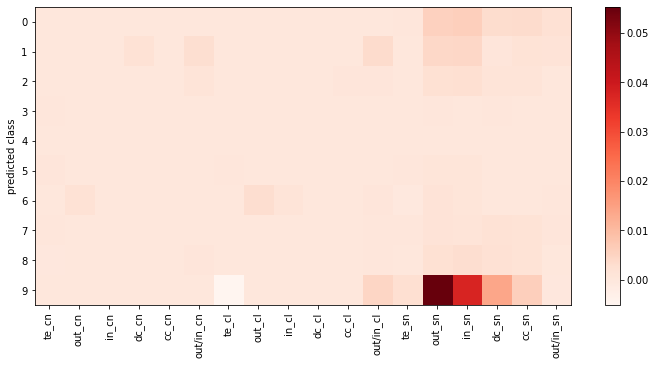

In [9]:
# filter only non-zero

plt.figure(figsize = (10, 6))
plt.imshow(np.sum(values_, axis = 2) / 144,cmap = "Reds")
#plt.imshow(np.sum(values_, axis = 2) / np.count_nonzero(values_, axis = 2), cmap = "coolwarm")
plt.colorbar(shrink = 0.75)
l = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
c = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
plt.xticks(l, columns, rotation='vertical')
plt.yticks(c)
plt.ylabel("predicted class")
plt.tight_layout()

plt.savefig("explanations_new_colorbar/lime_matrix.pdf")

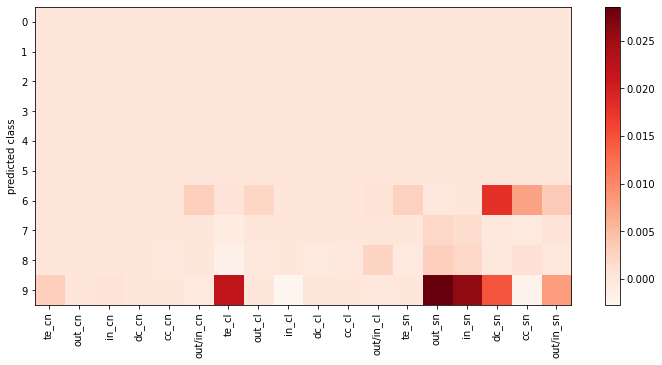

In [10]:
# filter only non-zero

plt.figure(figsize = (10, 6))
plt.imshow((np.sum(values_urban_2, axis = 2) / 60), cmap = "Reds")
#plt.imshow(np.sum(values_, axis = 2) / np.count_nonzero(values_, axis = 2), cmap = "coolwarm")
plt.colorbar(shrink = 0.75)
l = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
c = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
plt.xticks(l, columns, rotation='vertical')
plt.yticks(c)
plt.ylabel("predicted class")
plt.tight_layout()


plt.savefig("explanations_new_colorbar/lime_matrix_urban_2.pdf")

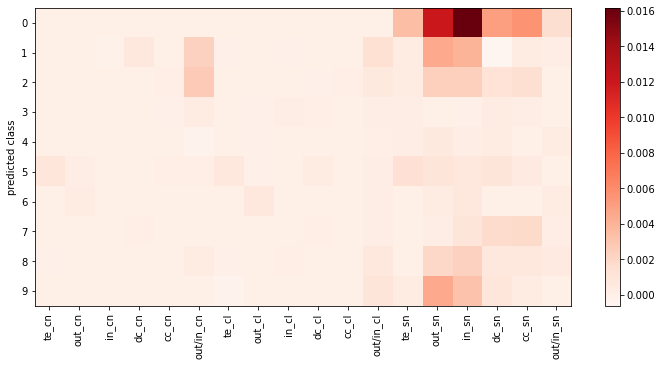

In [11]:
# filter only non-zero

plt.figure(figsize = (10, 6))
plt.imshow(np.sum(values_rural_2, axis = 2) / 84, cmap = "Reds")
#plt.imshow(np.sum(values_, axis = 2) / np.count_nonzero(values_, axis = 2), cmap = "coolwarm")
plt.colorbar(shrink = 0.75)
l = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
c = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
plt.xticks(l, columns, rotation='vertical')
plt.yticks(c)
plt.ylabel("predicted class")
plt.tight_layout()


plt.savefig("explanations_new_colorbar/lime_matrix_rural_2.pdf")